### Embeddings
An embedding represents data in a low-dimensional space as dense, fixed-size vectors, capturing relationships and similarities from the original data. Distances and directions between vectors reflect the structure of the original data.

So embedding is a vector that represents a certain object (word, sentence, product, ...)

### Word2Vec

- [The best word2vec explanation](https://jalammar.github.io/illustrated-word2vec/)

Word2Vec is a popular algorithm in NLP used for obtaining embeddings of words. Its main idea is that the meaning of a word can be inferred by the words closely surrounding it. One of the most remarkable properties of Word2Vec embeddings is their ability to capture semantic relationships through vector arithmetic. Here is a famous example:

**"king" - "man" + "woman" ≈ "queen"**

This works because the model learns consistent vector offsets for relationships like gender, tense, plurality, etc.

Other examples:
- `Paris - France + Italy = Rome` (capital relationships)
- `walking - walked + swam = swimming` (tense relationships)
- `bigger - big + small = smaller` (comparative forms)

**How to get embeddings of words?**

Under the hood Word2Vec uses a **shallow** neural network with a single hidden layer - Shallow NN is a NN that has only 1 or a few hidden layers (not deep). Besides, Word2Vec specifically doesn't use activation functions in hidden layer! Here are some reasons why Word2Vec avoids using non-linear activation functions:

- Keeps linearity and interpretation between embeddings of words! Non-linear activations would make embeddings less interpretable
- Faster Training

Architecture:

- **Input layer:**
    - consists of one-hot encoded vectors representing words
- **Hidden layer:** 
    - represents the word embeddings, which are learnt during training and words context 
        - Input: Embedding matrix. Describes properties of a centre word - _"What does this word mean?"_
        - Output: Context matrix. Describes properties of surrounding words - _"In what context does this word appear?"_
- **Output layer:** 
    - predicts the context or target words (predicts probability of the context word)

Important:
- Word2Vec doesn't use non-linear activations in hidden layer. Basically, hidden layer has no activations. Either softmax of sigmoind is used to calculate probabilities!

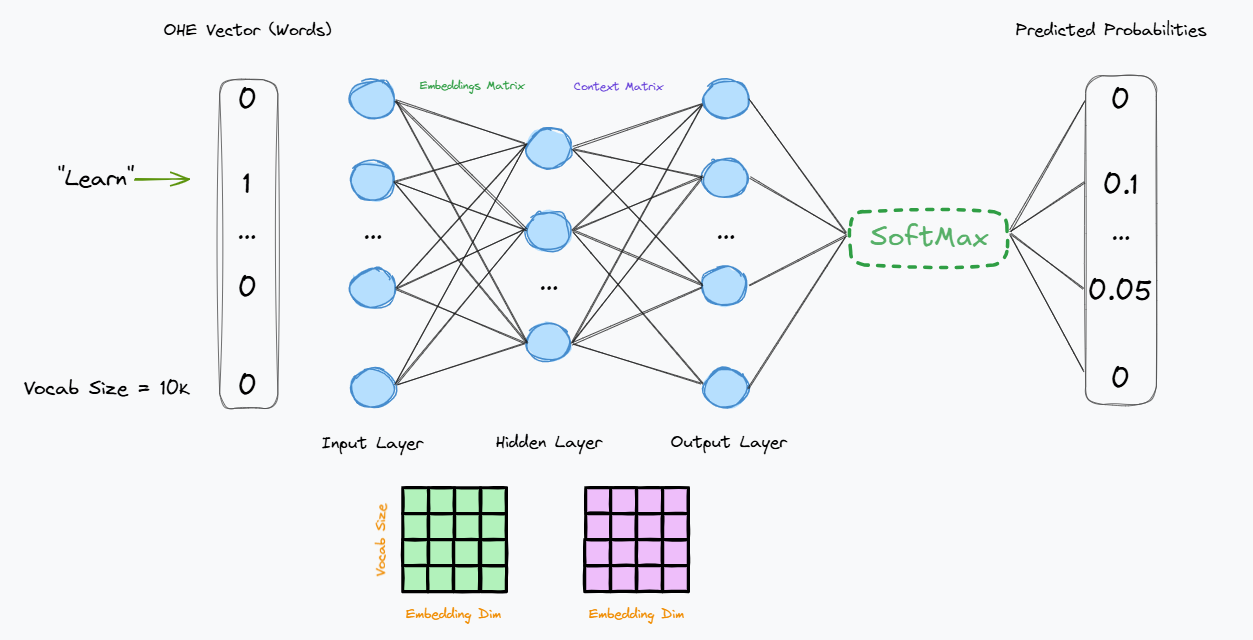

In practice only Embeddings are kept. However, in some research papers it's recommended to average Embeddings and Context. The training data is created using so-called "sliding window" that slides against the text and generates the data. 


**How the model is trained?**

The simplest idea is to train the model using _N Words before_ to predict the next word (target). However, in this case we focus only on one direction - what was before but we can use both directions - what is before the word and after! It leads to much better embeddings (semantic and context)
- One direction example: I was hit by a red <target> (difficult to predict the target)
- Two directions example: I was jit by a <target> car (easier to predict the target)

Thus, in practice usually used the second option to capture better context of surrounding words! This option has 2 methods:
- _Continuous Bag of Words (CBOW)_:
    - The model predicts the target word based on the context words surrounding it. The context words are used to predict the target word in the middle of a sliding window.
- _Skip-gram_:
    - In contrast to CBOW, the skip-gram architecture predicts the context words or surrounding words given a target word. It tries to maximize the probability of predicting context words given the target word

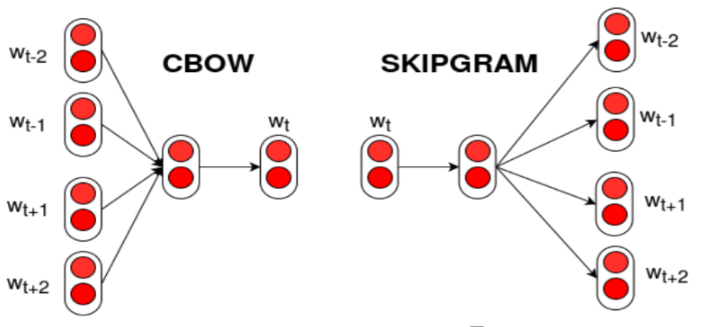

Embedding size should not be too small and big:
- `small`:
    - model badly represents relationships between words
- `big`: 
    - sparce vectors that might be similar to OHE in the end

When we don't have much data, better use `CBOW` -> less sensitive to overfitting. `CBOW` works faster than `SkipGram` but has worse ability to take into account rare words. 

Once embeddings are obtained, the following operations can be applied:
- Vector operations
- Similarity search
- Clustering
- Can be used as features for a model

### Skipgarm Issues
The main issue of Skipgram approach is that the 3d step (probability prediction) is expensive from a computational point of view:
- We have to compute/trigger softmax for every training sample

Besides, there are other issues:
- **Rare and Frequent words:**
    - Words that are rare have "bad" embeddings
    - Words that are too common dominates in training (e.g. "like", "and", "of", ...) and add a little semantic info

Thus, we cannot afford using this approach. Fortunately, there are some optimizations that speeds up training drastically:
- Negative Sampling
- Hierarchical Softmax

### Negative sampling
Instead of predicting probabilities for all words, it's turned into a binary classification problem. The training data consists of centre words and their true neighbours. This creates an issues that there are no negative examples. However, these examples are sampled from the vocab. In pracice, for each postive example we have to sample K negative.

The original paper prescribes 5-20 as being a good number of negative samples. It also states that 2-5 seems to be enough when you have a large enough dataset. The Gensim default is 5 negative samples.

Read more here:
- [The best word2vec explanation](https://jalammar.github.io/illustrated-word2vec/)

### Hierarchical Softmax
An alternative to negative sampling for efficient training that uses a binary tree structure.

**The Problem It Solves:**
- Standard softmax requires computing probabilities for ALL words in vocabulary (O(V) complexity)
- For large vocabularies (millions of words), this is computationally expensive

**How It Works:**
1. **Build a Huffman Tree**: 
    - Words are organized as leaf nodes in a binary Huffman tree, where frequent words have shorter paths from root
2. **Binary Classification Path**: 
    - Instead of one V-way classification, perform a series of binary decisions (left or right) along the path from root to target word
3. **Each Node Has a Vector**: 
    - Internal nodes have learned vectors used for binary classification at each step

**Complexity Reduction:**
- Reduces from O(V) to O(log V) where V is vocabulary size
- For 1 million words: from 1,000,000 operations to ~20 operations per training sample

**Probability Calculation:**
$$P(w|w_I) = \prod_{j=1}^{L(w)-1} \sigma\left( [[n(w,j+1) = \text{ch}(n(w,j))]] \cdot v'_{n(w,j)}{}^T v_{w_I} \right)$$

Where:
- $L(w)$ is the path length from root to word $w$
- $n(w,j)$ is the j-th node on the path
- $\text{ch}(n)$ is the left child of node $n$
- $[[x]]$ is 1 if x is true, -1 otherwise

**When to Use:**
- Better for **infrequent words** (they benefit from the tree structure)
- Negative sampling is generally preferred for **frequent words** and larger datasets
- Good when vocabulary is very large but computational resources are limited

### Word Frequency Issue
**Frequent Words**
- Frequent words appear in many contexts and training is wasted on trivial patterns. To solve the issues subsampling is used that randomly drops some frequent words during trainig. It was recommended by Mikolov from the paper.

**Subsampling Formula** - probability of keeping a word:

$$P_{keep}(w_i) = \sqrt{\frac{t}{f(w_i)}}$$

Where:
- $f(w_i)$ is the frequency of word $w_i$ in the corpus
- $t$ is a threshold parameter. Typically $10^{-5}$

According to the formula, rare words are always kept whereas frequent ones have low probability of being kept

**Rare Words**

Subsampling helps reducing effect of frequent words. However, it's still not enough to train good embeddings for rare words! Here are some methods that solve the issue:
- Use subword information (FastText Approach)
- Adjust negative sampling probabilities. It creates more negative examples of rare words (more data) 
- Have more data


### CBOW vs SkipGram 


| Aspect | CBOW | Skip-Gram | Explanation | 
|--------|------|-----------|-------------|
| Prediction Task | Predict centre word from context | Predict context words from centered word | 
| Computational Cost | Faster | Slower | Skip-Gram generates more centre-context pairs |
| Semantic Quality | Lower | Higher | Skip-Gram preserves words relationships |
| Typical Use Case | Small dataset, speed critical | Large datasets, quality critical | Trade-off between speed and embeddings quality |  
| Choice Today | Rare | Common | Skip-Gram + Negative Sampling provides better quality | 


### Word2Vec Pros and Cons

| Type | Aspect | Details |
|------|--------|---------|
| ✅ Pro | **Semantic & Syntactic Relationships** | Captures word analogies like "king - man + woman = queen", synonyms, antonyms |
| ✅ Pro | **Transfer Learning** | Pre-trained embeddings can be reused across different NLP tasks |
| ✅ Pro | **Fast Training** | With negative sampling/hierarchical softmax, trains efficiently on large corpora |
| ✅ Pro | **Versatility** | Works for text classification, sentiment analysis, machine translation, etc. |
| ❌ Con | **Context-Independent** | Single vector per word - "bank" has same embedding for "river bank" and "financial bank" (Polysemy) |
| ❌ Con | **Out-of-Vocabulary (OOV)** | Cannot handle words not seen during training. Assings a special <UNK> vector generated only once per OOV tokens |
| ❌ Con | **Ignores Word Order** | "dog bites man" and "man bites dog" have same context representation |
| ❌ Con | **Requires Large Data** | Needs substantial corpus for meaningful embeddings |
| ❌ Con | **Word Frequency Issue** | Poorly estimated embeddings for rare words. Frequent words dominate training without subsampling |
| ❌ Con | **No Morphology** | Treats "run", "runs", "running" as completely separate words |
| ❌ Con | **Non-contexctual** | Same embeddings for all meanings. Homonyms (e.g. "bank", "run") get one vector and cannot handle polysemy |
| ❌ Con | **Static Embeddings** | Cannot adapt to domain-specific meanings without retraining. Fine-tuning is tricky and not done in practice |
| ❌ Con | **Context Window** | Embeddings capture only local co-occurance patterns withing a fixed window, **not from the full global context** |
| ❌ Con | **Linear Model** | Efficient but shallow. Caputres only linear relationships. Cannot model complex, hierarchical patterns like deep LMs |

- If two words co-occur in the same document but are far apart, Word2Vec may not connect them

### Embeddings Visualization 
To understand and debug embeddings, visualization is essential:

- **t-SNE (t-Distributed Stochastic Neighbor Embedding)**:
  - Non-linear dimensionality reduction
  - Preserves local structure well
  - Good for visualizing clusters of similar words
  - Computationally expensive for large vocabularies

- **PCA (Principal Component Analysis)**:
  - Linear dimensionality reduction
  - Faster than t-SNE
  - Good for understanding global structure
  - First few components often capture meaningful dimensions (e.g., gender, tense)

- **UMAP (Uniform Manifold Approximation)**:
  - Faster than t-SNE with similar quality
  - Better at preserving global structure

### Glove and FastText

- `FastText`: 
    - FastText is an extension of Word2Vec, also developed by Facebook AI Research (FAIR). It was desinged to fix one of the biggest weakness: rare and OOV words. It introduces the concept of subword embeddings, where words are represented as bags of character n-grams. It helps handle OOV and rare words to capture morphological information better.

- `GloVe`: 
    - GlobalVectors is an unsupervised learning algorithm for obtaining word embeddings, developed by Stanford researchers. It constructs word embeddings by factorizing the co-occurrence matrix of words, emphasizing global word co-occurrence statistics.

**FastText**

As was mentioned before, the core idea of FastText is to represent a word as a sum of its character n-gram embeddings. The training is similar to Word2Vec (Skip-Gram + Negative Sampling or Hierarchical SoftMax), the only difference is the input - sum of N-Gram vectors. The words are represented in the following way:
- Example: "playing"

### FastText Deep Dive

FastText was developed by Facebook AI Research (FAIR) in 2016 to address Word2Vec's major weaknesses: <u>OOV word and rare words</u> by learning/using _Subword Embeddings_

Instead of learning one vector per word, FastText represents each word as a **bag of character n-grams** (subwords). Later, the final word embedding is represneted as a sum of its n-gram embeddings.

**How character n-grams are built?**

For example, let's consider 2 words: "where" and "nowhere" and create 3-grams:
- "where" -> {"whe", "her", "ere"}
- "nowhere" -> {"now", "owh", "whe", "her", "ere"}

Here we face with a problem - Although "nowhere" has 2 more tokens, it has a big overlap with other tokens for word "where". Thus, the embeddings will be similar, but it should not because these words have absolutely different meaning! FastText solves this issue by using a special _boundary market_ -> `<>` that prevents false similarity between words that have similar spelling. After applying _boundary market_ we get:
- "where" -> "<where>" -> {"<wh", "whe", "her", "ere", "re>"}
- "nowhere" -> "<nowhere> -> {"<no", "now", "owh", "whe", "her", "ere", "re>"}

Now the embeddings will describe that:
- Both words have similar subwords: "where" is inside "nowhere"
- Both words starts differently (prefix information): "where" -> "<wh", "nowhere" -> "<no". Thus, they have different meaning!

This approach allows FastText learn semantic of suffixes, prefixes and stems. Once the character n-grams are built, the word vector is represented as:

$$\vec{v}_w = \vec{z}_w + \sum_{g \in G_w} \vec{z}_g$$

Where:
- $\vec{v}_w$ is the final word vector for word $w$
- $\vec{z}_w$ is the vector for the full word itself
- $G_w$ is the set of all character n-grams of word $w$
- $\vec{z}_g$ is the vector for n-gram $g$

In short, the formula combines:
- _Subword information (n-grams)_ → handles OOV, rare words, morphology
- _Word-level information (full word)_ → preserves learned semantics for known words

**Training Process:**
- Same as Word2Vec (Skip-Gram + Negative Sampling or Hierarchical Softmax)
- Only difference: input is the **sum of n-gram vectors** instead of a single word vector

During training, all words in the corpus are known — FastText learns both:
- The full word vector $\vec{z}_w$ for each word in the vocabulary
- The n-gram vectors $\vec{z}_g$ for all character n-grams

The full word vector matters because:
- **For known words** (seen during training): combines learned word-level semantics with subword information
- **For OOV words** (at inference time): $\vec{z}_w$ doesn't exist, so the embedding is computed using **only** the n-gram sum:

$$\vec{v}_{OOV} = \sum_{g \in G_w} \vec{z}_g$$

This is why FastText can handle OOV words — the n-grams were likely seen in other training words, even if the full word wasn't. For example, the word "unbelievability" includes several words inside "believe" and "ability" and can be approximated using sum of n-gram vectors

**Key Hyperparameters:**
- `min_n`: 
    - Minimum n-gram length (default: 3)
- `max_n`: 
    - Maximum n-gram length (default: 6)

Setting `min_n=0, max_n=0` makes FastText equivalent to Word2Vec!

**Performance:**
- Training: 200M+ words in < 5 minutes on multicore CPU
- Inference: Nearly 150K classifications in < 1 minute
- Best suited for large datasets (1B+ words); small datasets need careful tuning!
- Algorithm is optimized and scaled. Thanks Facebook!

**Why FastText Works?**
| Problem | How FastText Solves It |
|---------|------------------------|
| **OOV Words** | Unknown words still have n-grams that were seen during training |
| **Rare Words** | Share n-grams with frequent words, getting better representations |
| **Morphology** | "playing", "played", "plays" share n-grams like "play" |
| **Typos** | "playng" shares most n-grams with "playing" |


**When to Use FastText over Word2Vec?**
- Languages with rich morphology (German, Turkish, Finnish, Russian)
- Domains with many rare/technical terms
- When OOV handling is critical
- Noisy text with typos (social media, user-generated content)

### GloVe Deep Dive

GloVe (Global Vectors) was developed by Stanford researchers in 2014 to address Word2Vec's limitation: <u>it only captures local context within a sliding window, ignoring global corpus statistics</u>.

Instead of learning from local context windows, GloVe learns embeddings by **factorizing the global word-word co-occurrence matrix** of the entire corpus.

**How the Co-occurrence Matrix is Built?**

First, we count how often words appear together <u>within a context window across the entire corpus</u>:

| | cat | sat | mat | the |
|---|-----|-----|-----|-----|
| **cat** | 0 | 5 | 2 | 10 |
| **sat** | 5 | 0 | 3 | 8 |
| **mat** | 2 | 3 | 0 | 6 |
| **the** | 10 | 8 | 6 | 0 |

- $X_{ij}$ = number of times word $j$ appears in the context of word $i$
- Matrix is symmetric: $X_{ij} = X_{ji}$
- Diagonal is typically 0 (word doesn't co-occur with itself)

**Core Idea: Ratios Encode Meaning**

GloVe's key insight is that **ratios of co-occurrence probabilities** encode semantic relationships better than raw probabilities:

| Probe Word $k$ | $P(k \mid ice)$ | $P(k \mid steam)$ | $\frac{P(k \mid ice)}{P(k \mid steam)}$ |
|----------------|-----------------|-------------------|----------------------------------------|
| solid | high | low | **large** (>> 1) |
| gas | low | high | **small** (<< 1) |
| water | high | high | **~1** |
| fashion | low | low | **~1** |

Words related to "ice" but not "steam" have large ratios, and vice versa. Neutral words have ratios ≈ 1.

**The GloVe Objective Function:**

GloVe learns word vectors such that their dot product equals the log of co-occurrence probability:

$$J = \sum_{i,j=1}^{V} f(X_{ij}) \left( \vec{w}_i^T \vec{\tilde{w}}_j + b_i + \tilde{b}_j - \log X_{ij} \right)^2$$

Where:
- $\vec{w}_i$ is the word vector for word $i$
- $\vec{\tilde{w}}_j$ is the context vector for word $j$
- $b_i, \tilde{b}_j$ are bias terms
- $X_{ij}$ is the co-occurrence count
- $f(X_{ij})$ is a weighting function

**Weighting Function $f(x)$:**

To prevent frequent word pairs from dominating training:

$$f(x) = \begin{cases} (x/x_{max})^\alpha & \text{if } x < x_{max} \\ 1 & \text{otherwise} \end{cases}$$

- $x_{max}$ = 100 (typical), $\alpha$ = 0.75
- Rare co-occurrences get lower weight
- Very frequent co-occurrences are capped

**Training Process:**
1. **Build co-occurrence matrix** from entire corpus (one-time, expensive)
2. **Initialize** word vectors and context vectors randomly
3. **Optimize** using stochastic gradient descent on non-zero entries
4. **Final embedding** = $\vec{w}_i + \vec{\tilde{w}}_i$ (sum of word and context vectors)

**Key Hyperparameters:**
- `vector_size`: 
    - Embedding dimensionality (50, 100, 200, 300)
- `window_size`:
    - Context window for co-occurrence counting (default: 15)
- `x_max`: 
    - Cutoff for weighting function (default: 100)
- `alpha`: 
    - Weighting exponent (default: 0.75)
- `iterations`: 
    - Training epochs (default: 25-50)

**Memory Consideration:**
- Co-occurrence matrix size: $O(V^2)$ where $V$ is vocabulary size
- For 1M words → 1 trillion entries (impractical!)
- In practice: sparse matrix storage (most entries are 0)

**Why GloVe Works?**

| Aspect | How GloVe Addresses It |
|--------|------------------------|
| **Global Context** | Uses statistics from entire corpus, not just local windows |
| **Semantic Ratios** | Probability ratios capture relationships like "king:queen::man:woman" |
| **Efficiency** | Matrix built once; training is faster than iterating over corpus |
| **Interpretability** | Objective function has clear mathematical meaning |

**GloVe vs Word2Vec:**

| Aspect | Word2Vec | GloVe |
|--------|----------|-------|
| **Approach** | Predictive (neural network) | Count-based (matrix factorization) |
| **Context** | Local (sliding window) | Global (full corpus statistics) |
| **Training** | Online (iterate over corpus) | Batch (pre-compute matrix) |
| **Memory** | Lower | Higher (co-occurrence matrix) |
| **Performance** | Similar | Similar |

**When to Use GloVe over Word2Vec?**
- When global word co-occurrence patterns matter
- When you have memory for the co-occurrence matrix
- When you want interpretable training objective
- Pre-trained GloVe embeddings are widely available and work well out-of-the-box

### FastText vs GloVe Comparison

| Aspect | FastText | GloVe |
|--------|----------|-------|
| **Developed By** | Facebook AI Research (2016) | Stanford (2014) |
| **Core Idea** | Subword embeddings (character n-grams) | Global co-occurrence matrix factorization |
| **Training Approach** | Predictive (like Word2Vec) | Count-based (matrix factorization) |
| **Context Type** | Local (sliding window) | Global (entire corpus statistics) |
| **OOV Handling** | ✅ Yes - uses n-grams of unseen words | ❌ No - cannot embed unseen words |
| **Rare Words** | ✅ Better - shares n-grams with frequent words | ❌ Struggles - needs sufficient co-occurrences |
| **Morphology** | ✅ Captures via subwords | ❌ Not captured |
| **Memory Usage** | Higher (stores n-gram vectors) | High (co-occurrence matrix) |
| **Training Speed** | Fast (online learning) | Moderate (matrix pre-computation) |
| **Typo Robustness** | ✅ Good - similar n-grams | ❌ Poor - treated as OOV |
| **Semantic Analogies** | Good | Good (ratios encode meaning) |
| **Best For** | Morphologically rich languages, noisy text, OOV-heavy domains | When global statistics matter, well-curated corpora |

**When to Choose:**
- **FastText**:
    - Social media, user-generated content, medical/legal jargon, agglutinative languages (Turkish, Finnish, German)
- **GloVe**: 
    - Clean text corpora, when pre-trained embeddings suffice, memory is available for co-occurrence matrix

### Pre-trained Models & Where to Find Them?

**Popular Pre-trained Embeddings:**
- **Google News Word2Vec**: 3 million words, 300 dimensions, trained on ~100 billion words
  - Download: [Google Drive](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM)
- **GloVe**: Multiple versions (6B, 42B, 840B tokens)
  - Download: [Stanford NLP](https://nlp.stanford.edu/projects/glove/)
- **FastText**: 157 languages, includes subword information
  - Download: [FastText Vectors](https://fasttext.cc/docs/en/crawl-vectors.html)

**When to use pre-trained vs train your own?**
- Use **pre-trained** for general-purpose tasks, limited data, or quick prototyping
- **Train your own** for domain-specific vocabulary (medical, legal, technical), non-English languages with limited resources, or when corpus is very different from general text

### Static vs Contextual Embeddings

**Static Embeddings** (Word2Vec, GloVe, FastText):
- One vector per word regardless of context
- "bank" has the same embedding whether it means "river bank" or "financial bank"
- Fast and memory-efficient
- Good baseline for many tasks

**Contextual Embeddings** (ELMo, BERT, GPT):
- Different vector for same word in different contexts
- Solves the polysemy problem
- More computationally expensive
- State-of-the-art (SOTA) for most NLP tasks

**Evolution Timeline:**
- 2013: Word2Vec (Google)
- 2014: GloVe (Stanford)
- 2016: FastText (Facebook)
- 2018: ELMo (AllenNLP) - first popular contextual embeddings
- 2018: BERT (Google) - bidirectional contextual embeddings
- 2018+: GPT series (OpenAI) - large language models

### Resources
- https://kavita-ganesan.com/comparison-between-cbow-skipgram-subword/
- [Glove Explanation](https://www.youtube.com/watch?v=qi_gcdi19zs)
- [Nice Kaggle Notebook](https://www.kaggle.com/c/word2vec-nlp-tutorial)
